# CNN for Chromagram only (3 secs)

## 1 - All 10

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
FILE_PATH = os.path.join('Data', 'chromagrams (3 secs)', 'chromagram_24')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


## Apply the confusion matrix after the model

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step


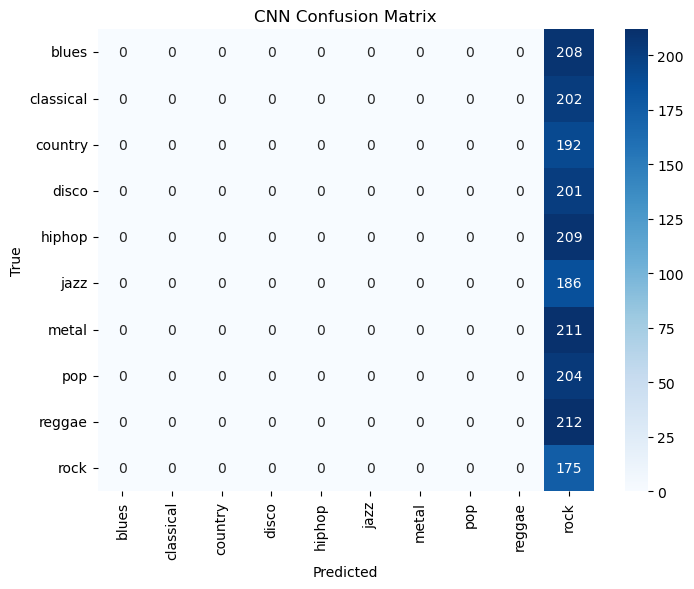

In [10]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2 - Limited Genres Easy (metal and classical)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['classical', 'metal']
FILE_PATH = os.path.join('Data', 'chromagrams (3 secs)', 'chromagram_24')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


Going through classical


FileNotFoundError: [Errno 2] No such file or directory: 'Data/chromagrams (3 secs)/chromagram_24/classical'

## Confusion Matrix Easy (classical and metal)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


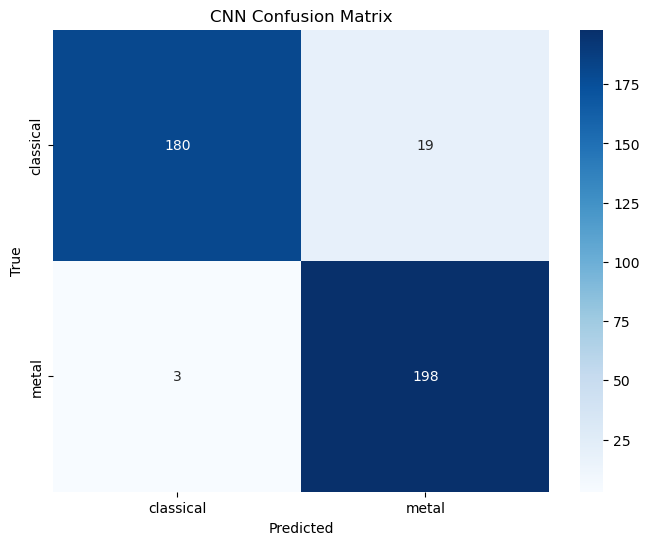

In [12]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 3 - Limited genres Hard (disco and pop)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['disco', 'pop']
FILE_PATH = os.path.join('Data', 'chromagrams (3 secs)', 'chromagram_24')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

Going through disco
Going through pop


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 414ms/step - accuracy: 0.4340 - loss: 1.2298 - val_accuracy: 0.5200 - val_loss: 0.7083 - learning_rate: 1.0000e-04
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 397ms/step - accuracy: 0.5042 - loss: 0.8461 - val_accuracy: 0.5025 - val_loss: 0.7303 - learning_rate: 1.0000e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.5334 - loss: 0.7770 - val_accuracy: 0.5050 - val_loss: 0.7071 - learning_rate: 1.0000e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.5075 - loss: 0.7798 - val_accuracy: 0.4975 - val_loss: 0.7040 - learning_rate: 1.0000e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.5020 - loss: 0.7661 - val_accuracy: 0.5025 - val_loss: 0.7159 - learning_rate: 1.0000e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.4925 - loss: 0.7643 - val_accuracy: 0.5025 - val_loss: 0.7105 - learning_rate: 1.0000e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 393ms/step - acc

## 12 - Confusion Matrix Hard (disco and pop)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


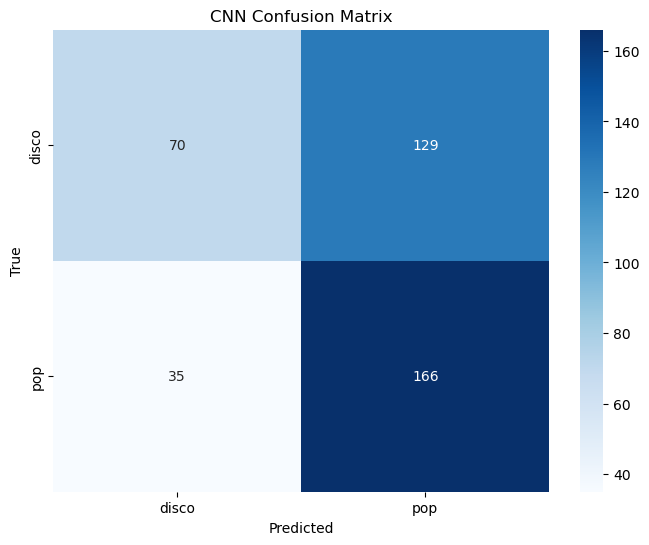

In [14]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 13 - Limited Genres Medium (5 random)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import random

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
GENRES = random.sample(GENRES, 5)
print(GENRES)
FILE_PATH = os.path.join('Data', 'chromagrams (3 secs)', 'chromagram_24')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


['rock', 'hiphop', 'pop', 'country', 'classical']
Going through rock
Going through hiphop
Going through pop
Going through country
Going through classical


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 53s 393ms/step - accuracy: 0.2023 - loss: 2.0266 - val_accuracy: 0.1930 - val_loss: 1.7194 - learning_rate: 1.0000e-04
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 391ms/step - accuracy: 0.2030 - loss: 1.7738 - val_accuracy: 0.3370 - val_loss: 1.6506 - learning_rate: 1.0000e-04
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 392ms/step - accuracy: 0.2067 - loss: 1.6967 - val_accuracy: 0.3540 - val_loss: 1.5651 - learning_rate: 1.0000e-04
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 385ms/step - accuracy: 0.2704 - loss: 1.6147 - val_accuracy: 0.3590 - val_loss: 1.4766 - learning_rate: 1.0000e-04
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 394ms/step - accuracy: 0.3181 - loss: 1.5129 - val_accuracy: 0.3800 - val_loss: 1.3673 - learning_rate: 1.0000e-04
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 49s 394ms/step - accuracy: 0.3886 - loss: 1.3868 - val_accuracy: 0.3990 - val_loss: 1.2980 - learning_rate: 1.0000e-04
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 38

## 14 - Confusion Matrix Medium (5 random)

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step


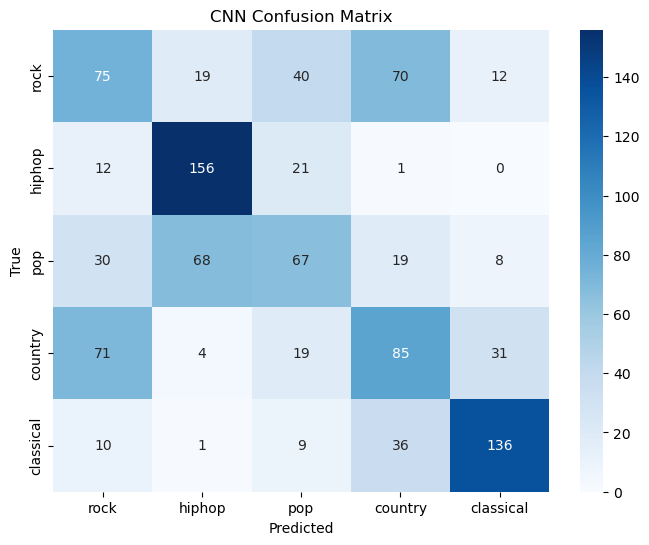

In [16]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()